<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Música generativa em LSTM***
---

In [9]:
#@title **Identificação do Grupo**

Aluno1 = '10390339, Leonardo Biagiotti Beloti' #@param {type:"string"}
Aluno2 = '10389222, Lucas Damasceno da Cunha Lima' #@param {type:"string"}
Aluno3 = '10389472, Lucas Iudi Corregliano Gallinari' #@param {type:"string"}
Aluno4 = '10389723, Thiago Aidar Figueiredo' #@param {type:"string"}
Aluno5 = '10388769, Yiou Wu' #@param {type:"string"}




# **Resumo (*Abstract*)**

Este projeto tem como objetivo gerar músicas a partir da  de redes neurais artificiais Long-Short Term Memory (LSTM). A técnica de web scraping foi aplicada no processo de obtenção das obras em coletâneas MIDI. No pré-processamento dos arquivos MIDI, as músicas foram transpostas para a mesma tonalidade com a finalidade da redução de dimensionalidade do dataset, diminuindo a quantidade de notas únicas. Foi utilizada uma estrutura para armazenar as notas e acordes com informações de seu tom, duração e o tempo decorrido em relação ao último evento (offset). Essas informações foram convertidas em séries temporais como entrada para o treinamento dos modelos e geração de sequências musicais. Foi utilizada a rede neural proposta por Jordan Bird para a geração musical.

# **Referencial Teórico**

## **MIDI**
Um arquivo em formato MIDI usa de seu próprio protocolo de comunicação para interações de instrumentos eletrônicos em um ambiente digital, permitindo o armazenamento e manipulação de obras musicais por um baixo custo. O formato contém quatro parâmetros que definem os eventos de uma composição: NOTE_ON, NOTE_OFF, VELOCITY e TIME_SHIFT. A partir destas informações, é possível extrair informações dos eventos que ocorrem dentre composições. Um evento pode conter um NOTE_ON de uma única nota, assim como o NOTE_ON de um acorde. Pelo parametro de TIME_SHIFT é possível extrair o tempo que cada nota ocorre durante uma composição. A duração de uma nota seria o tempo decorrido entre seu NOTE_ON e NOTE_OFF.

 ## **Série Temporal**

 Uma série temporal pode ser descrita como uma sequência de eventos coletados dentre intervalos de tempo regulares. Sua análise busca por padrões que ajudem a identificar tendências e características que auxiliam na previsão de novos eventos. Uma música pode ser representada como tal, a partir da disposição de notas em intervalos regulares de tempo.

 ## **Rede Neural Artificial**

 Uma rede neural artificial (ANN) é um modelo computacional inspirado no sistema nervoso humano, que tem em sua estrutura entradas, neurônios e saídas. Elas são capazes de aprender a realizar tarefas complexas, como reconhecimento de padrões, processamento de linguagem natural e, neste caso, será utilizada para a geração de música. As ANNs podem ser divididas em feedforward, na qual as informações fluem em uma direção, e recurrent, onde informações podem fluir em qualquer direção, sendo possível loopbacks.

 ## **LSTM**

 Recurrent Neural Networks (RNNs) são modelos usados para processar dados sequenciais, tendo conexões recursivas que permitem capturar dependências de longo prazo nos dados da sequência. Um dos desafios comuns no treinamento de RNNs é o problema do desaparecimento do gradiente, que ocorre quando o gradiente se torna muito pequeno ou muito grande à medida que os passos de tempo aumentam durante o backpropagation. Isso torna difícil treinar RNNs, pois as atualizações do gradiente têm impacto nos pesos.

Uma maneira de resolver o problema do desaparecimento do gradiente é usar redes de memória de longo prazo, Long-Short Term Memory (LSTM). Redes LSTM são um tipo especial de RNN que possuem três portas: entrada, esquecimento e saída. Essas portas controlam como as informações fluem para dentro, para fora e através de suas unidades. A célula LSTM guarda informações de iterações anteriores e as compara com a entrada atual para determinar se novas informações serão armazenadas e passadas adiante colah.

## **Rede neural de Jordan Bird**

O modelo proposto por Jordan Bird apresenta intervalos de tempo irregulares e é caracterizado pela polifonia. Este utiliza três variáveis principais: pitch (altura dos sons), offset (início temporal) e duration (duração), onde pitch representa as notas musicais, offset indica o momento de início da nota em relação à nota anterior e duration refere-se ao tempo de execução da nota.






> ## **Conceitos Chave**

> ### 1. *Web Scraping*
 Processo empregado para extrair informações de servidores via requisições HTTP. Utilizaram-se as bibliotecas requests e BeutifulSoup.

> ### 2. *Epoch*

Uma Epoch seria a execução de uma etapa de treinamento para o conjunto de dados. A quantidade de Epochs pode ser definida no modelo e sua duração depende da quantidade de dados e estrutura da rede neural utilizada.

> ### 3. *Criação de sequências*

Para o treinamento do modelo de rede neural, as musicas que tem seus eventos armazenados em arrays, são utilizadas para criar as sequências de notas. Por se tratar de um aprendizado supervisionado, para cada entrada haverá uma saída rotulada. Assim a saída rotulada será o evento que ocorre logo após a sequência de 100 notas que serve de entrada. São produzidas, para um array de n eventos, (n-100) sequências e saídas rotuladas.


> ### 4. *Dropout*

 A técnica de Dropout é utilizada para evitar o overfitting em modelos de Deep
Learning, g que o modelo generalize bem para novos dados. Isso permite produzir composições que não são apenas variações das musicas de treinamento, trazendo originalidade e a diversidade as composições geradas.

> ### 5. *Função de Ativação - ReLU*

ReLU(x) = max (0, x)
Isso significa que, para qualquer valor de entrada 𝑥x, a função ReLU retorna 𝑥x se 𝑥x for positivo; caso contrário, retorna 0. Em termos matemáticos:

Se 𝑥≥0x≥0, então ReLU(𝑥)=𝑥ReLU(x)=x.

Se 𝑥<0x<0, então ReLU(𝑥)=0ReLU(x)=0.

A principal vantagem de usar a função ReLU sobre outras funções de ativação é que ela não ativa todos os neurônios ao mesmo tempo. Se a entrada de uma função ReLu for negativa, ela será convertida em zero e o neurônio não será ativado, isso significa que, ao mesmo tempo, apenas alguns neurônios são ativados. Portanto, a função ReLu é computacionalmente eficiente, pois envolve operações simples. Ao contrário de funções de ativação como a sigmoid e a tangente hiperbólica, a ReLU não sofre com o problema da saturação para valores positivos. Isso permite que os gradientes durante o treinamento sejam maiores e, assim, a rede neural possa aprender mais rapidamente.

# **Exemplo de Aplicação**

Na implementação abaixo foi aplicado o Web Scraping para a obtenção das músicas no formato MIDI. Estas foram transpostas e salvas para o treinamento do modelo de Jordan Bird. Ao final, a partir da biblioteca fluidsynth, é possível gerar e reproduzir musícas a partir do treinamento do modelo.

Para a execução dos códigos presentes neste Colab, recomenda-se a execução por uma GPU dedicada devido ao tempo necessário por Epoch no treinamento.

# **Implementação**


Primeiro, será necessário montar seu drive para armazenar os arquivos obtidos por Web Scraping e aqueles gerados durante a execução do modelo. Para isso foi criado o diretório /musicasComLSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dir = 'drive/MyDrive/musicasComLSTM'
if not os.path.exists(dir):
    os.makedirs(dir)

In [ ]:
%cd /content/drive/MyDrive/musicasComLSTM/

/content/drive/MyDrive/musicasComLSTM


Para o Web Scraping, será necessário instalar as dependências abaixo

In [ ]:
# Instalando dependências para Web Scraping
!pip install bs4
!pip install requests

O código de Web Scraping abaixo utiliza das bibliotecas requests e BeautifulSoup para criar as requisições HTTP para extrair os componentes do site com tag "a" do HTML, buscando pelo elemento href. Nele também é criado o diretório de Obras, onde as músicas obtidas são salvas.

In [ ]:
# Web Scraping em http://kern.ccarh.org/cgi-bin/ksbrowse?l=/users/craig/classical/bach/371chorales
from urllib.parse import urljoin, urlparse
from bs4 import BeautifulSoup
import os
import requests
import time

if not os.path.exists('/content/drive/MyDrive/musicasComLSTM/Obras'):
    os.makedirs('/content/drive/MyDrive/musicasComLSTM/Obras')

url0 = 'https://kern.humdrum.org/cgi-bin/ksdata?file=chor'
url1 = '.krn&l=users/craig/classical/bach/371chorales&format=midi'

songNumber = 0
response = requests.get('http://kern.ccarh.org/cgi-bin/ksbrowse?l=/users/craig/classical/bach/371chorales')
status = response.status_code

content = response.content
parser = BeautifulSoup(content, features='html.parser')
body = parser.body

for link in body.find_all('a'):
    href = link.get('href')
    url = urljoin(url0 + "{:03d}".format(songNumber) + url1, href)
    filename = os.path.basename('chor' + "{:03d}".format(songNumber)  + '.mid')

    if os.path.isfile(os.path.join('Obras', filename)):
      continue

    if href is not None and 'format=midi' in href:
        response = requests.get(url)
        status = response.status_code
        if status == 200:
            try:
                with open(os.path.join('Obras', filename), 'wb') as file:
                    file.write(response.content)
                    songNumber += 1;
            except:
                print(f'File \'{filename}\' is corrupted or currently in use.')

        else:
            print(f'Failed to download \'{filename}\' file.')

Após concluir esta etapa, haverá um diretório /Obras contendo todas as músicas obtidas no processo. Em sequência, é necessário instalar a biblioteca music21 para manipular arqivos MIDI. Também foi criado um diretório para conter as obras transpostas.



In [ ]:
# Instalando biblioteca para explorar arquivos MIDI
!pip install music21

Foram importadas todas as bibliotecas necessárias para a estruturação do modelo e criação de entradas e saídas rotuladas.

In [ ]:
# Importando bibliotecas necessárias para criação do dataset e modelo LSTM

import pickle
import numpy
import glob
from music21 import converter, instrument, note, stream, chord
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import BatchNormalization as BatchNorm
from keras.layers import Activation
from keras.layers import Bidirectional
from keras.layers import concatenate
from keras.layers import Input
import keras.utils as np_utils
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras import Model
import tensorflow as tf

No diretório data serão salvas as listas de eventos, durações e offsets das músicas lidas, para posteriormente utilizar na geração de sequências. No diretório weights, serão salvos todos os pesos que representem melhorias significativas ao modelo.

In [ ]:
dir = 'data'
if not os.path.exists(dir):
    os.makedirs(dir)
dir = 'weights'
if not os.path.exists(dir):
    os.makedirs(dir)

A função get_notes() é utilizada para a leitura dos arquivos MIDI e extrair as informações das musicas como eventos (se seria uma nota ou acorde), offsets e durações de cada evento. Essas informações são extraidas junto a biblioteca Music21 e são salvas no diretório data, além de serem retornadas a função train_network, onde são definidos os eventos, offsets e durações unicos. Também é nesta funçao onde se criam as sequências e é criado o modelo e iniciado o treinameto.

A função prepare_sequences é utilizada para eventos, offsets e durações, onde são mapeados os arrays de acordo com o dicionário de eventos, offsets e durações únicas e geradas as sequências de input e seu output.

O modelo de Jordan propõe o uso de uma camada de LSTM para eventos, offsets e durações. Os resultados destas são concatenados e introduzidos a outras camadas intermediárias. Neste modelo foi utilizada a função de ativação ReLU e Dropout para evitar overfitting, junto ao otimizador Adam. Ao final do quinto LSTM da arquitetura proposta, os resultados são separados de volta para eventos, offsets e durações. Para retomar o treinamento partindo de um peso, pode ser indicado no final da função create_network o arquivo de pesos que se deseja utilizar.

A função train() seria utilizada para o treinamento do modelo, recebendo os inputs e outputs como parametros. As melhorias dos pesos são salvas no diretório weights, e a quantidade de Epochs é declarada n final da função.

In [ ]:
# Criação do modelo de geração de trechos musicais em MIDI usando LSTM (Modelo de Jordan Bird)

def train_network():
	""" Train a Neural Network to generate music """
	notes, offsets, durations = get_notes()

	n_vocab_notes = len(set(notes))
	network_input_notes, network_output_notes = prepare_sequences(notes, n_vocab_notes)

	n_vocab_offsets = len(set(offsets))
	network_input_offsets, network_output_offsets = prepare_sequences(offsets, n_vocab_offsets)

	n_vocab_durations = len(set(durations))
	network_input_durations, network_output_durations = prepare_sequences(durations, n_vocab_durations)
	model = create_network(network_input_notes, n_vocab_notes, network_input_offsets, n_vocab_offsets, network_input_durations, n_vocab_durations)
	train(model, network_input_notes, network_input_offsets, network_input_durations, network_output_notes, network_output_offsets, network_output_durations)


def get_notes():
		""" Get all the notes and chords from the MIDI files """
		notes = []
		offsets = []
		durations = []

		# Specify the full path to the directory containing MIDI files
		for file in glob.glob("Obras/*.mid"):

			midi = converter.parse(file)  # Parse MIDI file

			print("Parsing %s" % file)

			notes_to_parse = None

			try: # file has instrument parts
				s2 = instrument.partitionByInstrument(midi)
				notes_to_parse = s2.parts[0].recurse()
			except: # file has notes in a flat structure
				notes_to_parse = midi.flat.notes

			offsetBase = 0
			for element in notes_to_parse:
				isNoteOrChord = False

				if isinstance(element, note.Note):
					notes.append(str(element.pitch))
					isNoteOrChord = True
				elif isinstance(element, chord.Chord):
					notes.append('.'.join(str(n) for n in element.normalOrder))
					isNoteOrChord = True

				if isNoteOrChord:
					offsets.append(str(element.offset - offsetBase))
					durations.append(str(element.duration.quarterLength))
					isNoteOrChord = False
					offsetBase = element.offset

		print("Length of notes array:", len(notes))
		print("Length of offsets array:", len(offsets))
		print("Length of durations array:", len(durations))

		# Salvando em arquivos binarios
		with open('data/notes', 'wb') as filepath:
			pickle.dump(notes, filepath)

		with open('data/durations', 'wb') as filepath:
			pickle.dump(durations, filepath)

		with open('data/offsets', 'wb') as filepath:
			pickle.dump(offsets, filepath)

		return notes, offsets, durations


def prepare_sequences(notes, n_vocab):
	""" Prepare the sequences used by the Neural Network """
	sequence_length = 30
	print("Length of notes array:", len(notes))
	# verificar pitches unicos
	pitchnames = sorted(set(item for item in notes))

	 # dicionario para mapear o pitches
	note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

	network_input = []
	network_output = []

	# criação de sequencias e seus respectivos outputs
	for i in range(0, len(notes) - sequence_length, 1):
		sequence_in = notes[i:i + sequence_length]
		sequence_out = notes[i + sequence_length]
		network_input.append([note_to_int[char] for char in sequence_in])
		network_output.append(note_to_int[sequence_out])

	n_patterns = len(network_input)

	# reshape do input para a rede neural
	network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
	# normalizar inputs
	network_input = network_input / float(n_vocab)

	network_output = tf.keras.utils.to_categorical(network_output, num_classes=n_vocab)

	return (network_input, network_output)

def create_network(network_input_notes, n_vocab_notes, network_input_offsets, n_vocab_offsets, network_input_durations, n_vocab_durations):

	# Parte da rede que considera apenas as sequencias de eventos
	inputNotesLayer = Input(shape=(network_input_notes.shape[1], network_input_notes.shape[2]))
	inputNotes = LSTM(
		256,
		input_shape=(network_input_notes.shape[1], network_input_notes.shape[2]),
		return_sequences=True
	)(inputNotesLayer)
	inputNotes = Dropout(0.2)(inputNotes)

	# Parte da rede que considera apenas as sequencias de offsets
	inputOffsetsLayer = Input(shape=(network_input_offsets.shape[1], network_input_offsets.shape[2]))
	inputOffsets = LSTM(
		256,
		input_shape=(network_input_offsets.shape[1], network_input_offsets.shape[2]),
		return_sequences=True
	)(inputOffsetsLayer)
	inputOffsets = Dropout(0.2)(inputOffsets)

	# Parte da rede que considera apenas as sequencias de durações
	inputDurationsLayer = Input(shape=(network_input_durations.shape[1], network_input_durations.shape[2]))
	inputDurations = LSTM(
		256,
		input_shape=(network_input_durations.shape[1], network_input_durations.shape[2]),
		return_sequences=True
	)(inputDurationsLayer)
	inputDurations = Dropout(0.2)(inputDurations)

	#Concatenação de eventos, offset e duração
	inputs = concatenate([inputNotes, inputOffsets, inputDurations])

	# LSTMs que consideram os aprendizados individuais das outras etapas
	x = LSTM(512, return_sequences=True)(inputs)
	x = Dropout(0.3)(x)
	x = LSTM(512)(x)
	x = BatchNorm()(x)
	x = Dropout(0.3)(x)
	x = Dense(256, activation='relu')(x)

	#Separação de evento, offset e duração

	# Classifica os eventos
	outputNotes = Dense(128, activation='relu')(x)
	outputNotes = BatchNorm()(outputNotes)
	outputNotes = Dropout(0.3)(outputNotes)
	outputNotes = Dense(n_vocab_notes, activation='softmax', name="Note")(outputNotes)

	# Classifica o offset
	outputOffsets = Dense(128, activation='relu')(x)
	outputOffsets = BatchNorm()(outputOffsets)
	outputOffsets = Dropout(0.3)(outputOffsets)
	outputOffsets = Dense(n_vocab_offsets, activation='softmax', name="Offset")(outputOffsets)

	# Classifica a duração
	outputDurations = Dense(128, activation='relu')(x)
	outputDurations = BatchNorm()(outputDurations)
	outputDurations = Dropout(0.3)(outputDurations)
	outputDurations = Dense(n_vocab_durations, activation='softmax', name="Duration")(outputDurations)

	# Informa os inputs e outputs do modelo
	model = Model(inputs=[inputNotesLayer, inputOffsetsLayer, inputDurationsLayer], outputs=[outputNotes, outputOffsets, outputDurations])

	#Otimizador Adam tem melhores resultados que RMSprop, para loss utilizar categorical_crossentropy
	model.compile(loss='categorical_crossentropy', optimizer='adam')

	# Carregar os pesos mais recentes para continuar o treinamento
	# model.load_weights("weights/arquivo.hdf5")

	return model

def train(model, network_input_notes, network_input_offsets, network_input_durations, network_output_notes, network_output_offsets, network_output_durations):
	""" train the neural network """
	filepath = "weights/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
	checkpoint = ModelCheckpoint(
		filepath,
		monitor='loss',
		verbose=0,
		save_best_only=True,
		mode='min'
	)
	callbacks_list = [checkpoint]

	model.fit([network_input_notes, network_input_offsets, network_input_durations], [network_output_notes, network_output_offsets, network_output_durations], epochs=100, batch_size=64, callbacks=callbacks_list, verbose=1)

Função train_network inicia o treinamento.

In [ ]:
# Executando treinamento do modelo com dataset obtido
train_network()

Após o treinamento, são lidos os arquivos binários para a geração de sequências na função generate() e chamada a função generate_notes(), que partindo de eventos, durações e offsets aleatórios, faz a geração da nota em sequencia, sendo sempre escolhida a nota de maior probabilidade.

Ao final de generate() temos a função create_midi(), que produz um arquivo MIDI pelas notas geradas e o salva no diretório musicasComLSTM.

In [8]:
# Código para geraçao de trechos musicais usando o modelo LSTM para preditar as notas, duracoes e offsets

def generate():
	""" Generate a piano midi file """
	#load the notes used to train the model
	with open('data/notes', 'rb') as filepath:
		notes = pickle.load(filepath)

	with open('data/durations', 'rb') as filepath:
		durations = pickle.load(filepath)

	with open('data/offsets', 'rb') as filepath:
		offsets = pickle.load(filepath)

	# Get all pitch names
	#pitchnames = sorted(set(item for item in notes))
	# Get all pitch names
	#n_vocab = len(set(notes))


	notenames = sorted(set(item for item in notes))
	n_vocab_notes = len(set(notes))
	network_input_notes, normalized_input_notes = prepare_sequences(notes, notenames, n_vocab_notes)

	offsetnames = sorted(set(item for item in offsets))
	n_vocab_offsets = len(set(offsets))
	network_input_offsets, normalized_input_offsets = prepare_sequences(offsets, offsetnames, n_vocab_offsets)

	durationames = sorted(set(item for item in durations))
	n_vocab_durations = len(set(durations))
	network_input_durations, normalized_input_durations = prepare_sequences(durations, durationames, n_vocab_durations)

	#model = create_network(network_input_notes, n_vocab_notes, network_input_offsets, n_vocab_offsets, network_input_durations, n_vocab_durations)

	model = create_network(normalized_input_notes, n_vocab_notes, normalized_input_offsets, n_vocab_offsets, normalized_input_durations, n_vocab_durations)


	#network_input, normalized_input = prepare_sequences(notes, pitchnames, n_vocab)
	#model = create_network(normalized_input, n_vocab)

	prediction_output = generate_notes(model, network_input_notes, network_input_offsets, network_input_durations, notenames, offsetnames, durationames, n_vocab_notes, n_vocab_offsets, n_vocab_durations)
	create_midi(prediction_output)

def prepare_sequences(notes, pitchnames, n_vocab):
	""" Prepare the sequences used by the Neural Network """
	# map between notes and integers and back
	note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

	sequence_length = 30
	network_input = []
	output = []
	for i in range(0, len(notes) - sequence_length, 1):
		sequence_in = notes[i:i + sequence_length]
		sequence_out = notes[i + sequence_length]
		network_input.append([note_to_int[char] for char in sequence_in])
		output.append(note_to_int[sequence_out])

	n_patterns = len(network_input)

	# reshape the input into a format compatible with LSTM layers
	normalized_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
	# normalize input
	normalized_input = normalized_input / float(n_vocab)

	return (network_input, normalized_input)

def create_network(network_input_notes, n_vocab_notes, network_input_offsets, n_vocab_offsets, network_input_durations, n_vocab_durations):
	# Branch of the network that considers notes
	inputNotesLayer = Input(shape=(network_input_notes.shape[1], network_input_notes.shape[2]))
	inputNotes = LSTM(
		256,
		input_shape=(network_input_notes.shape[1], network_input_notes.shape[2]),
		return_sequences=True
	)(inputNotesLayer)
	inputNotes = Dropout(0.2)(inputNotes)

	# Branch of the network that considers note offset
	inputOffsetsLayer = Input(shape=(network_input_offsets.shape[1], network_input_offsets.shape[2]))
	inputOffsets = LSTM(
		256,
		input_shape=(network_input_offsets.shape[1], network_input_offsets.shape[2]),
		return_sequences=True
	)(inputOffsetsLayer)
	inputOffsets = Dropout(0.2)(inputOffsets)

	# Branch of the network that considers note duration
	inputDurationsLayer = Input(shape=(network_input_durations.shape[1], network_input_durations.shape[2]))
	inputDurations = LSTM(
		256,
		input_shape=(network_input_durations.shape[1], network_input_durations.shape[2]),
		return_sequences=True
	)(inputDurationsLayer)
	#inputDurations = Dropout(0.3)(inputDurations)
	inputDurations = Dropout(0.2)(inputDurations)

	#Concatentate the three input networks together into one branch now
	inputs = concatenate([inputNotes, inputOffsets, inputDurations])

	# A cheeky LSTM to consider everything learnt from the three separate branches
	x = LSTM(512, return_sequences=True)(inputs)
	x = Dropout(0.3)(x)
	x = LSTM(512)(x)
	x = BatchNorm()(x)
	x = Dropout(0.3)(x)
	x = Dense(256, activation='relu')(x)

	#Time to split into three branches again...

	# Branch of the network that classifies the note
	outputNotes = Dense(128, activation='relu')(x)
	outputNotes = BatchNorm()(outputNotes)
	outputNotes = Dropout(0.3)(outputNotes)
	outputNotes = Dense(n_vocab_notes, activation='softmax', name="Note")(outputNotes)

	# Branch of the network that classifies the note offset
	outputOffsets = Dense(128, activation='relu')(x)
	outputOffsets = BatchNorm()(outputOffsets)
	outputOffsets = Dropout(0.3)(outputOffsets)
	outputOffsets = Dense(n_vocab_offsets, activation='softmax', name="Offset")(outputOffsets)

	# Branch of the network that classifies the note duration
	outputDurations = Dense(128, activation='relu')(x)
	outputDurations = BatchNorm()(outputDurations)
	outputDurations = Dropout(0.3)(outputDurations)
	outputDurations = Dense(n_vocab_durations, activation='softmax', name="Duration")(outputDurations)

	# Tell Keras what our inputs and outputs are
	model = Model(inputs=[inputNotesLayer, inputOffsetsLayer, inputDurationsLayer], outputs=[outputNotes, outputOffsets, outputDurations])

	#Adam seems to be faster than RMSProp and learns better too
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	model.load_weights("weights_transposed/weights-improvement-06-0.5417-bigger.hdf5")

	return model

def generate_notes(model, network_input_notes, network_input_offsets, network_input_durations, notenames, offsetnames, durationames, n_vocab_notes, n_vocab_offsets, n_vocab_durations):
	""" Generate notes from the neural network based on a sequence of notes """
	# pick a random sequence from the input as a starting point for the prediction
	# start = numpy.random.randint(0, len(network_input_notes)-1)
	# start2 = numpy.random.randint(0, len(network_input_offsets)-1)
	# start3 = numpy.random.randint(0, len(network_input_durations)-1)

	start = 0
	start2 = 0
	start3 = 0

	int_to_note = dict((number, note) for number, note in enumerate(notenames))
	print(int_to_note)
	int_to_offset = dict((number, note) for number, note in enumerate(offsetnames))
	int_to_duration = dict((number, note) for number, note in enumerate(durationames))

	pattern = network_input_notes[start]
	pattern2 = network_input_offsets[start2]
	pattern3 = network_input_durations[start3]
	prediction_output = []

	# generate notes or chords
	for note_index in range(100):
		note_prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
		predictedNote = note_prediction_input[-1][-1][-1]
		#print(note_prediction_input.shape)

		#print(n_vocab_notes)
		#print(n_vocab_offsets)
		#print(n_vocab_durations)


		note_prediction_input = note_prediction_input / float(n_vocab_notes)

		offset_prediction_input = numpy.reshape(pattern2, (1, len(pattern2), 1))
		offset_prediction_input = offset_prediction_input / float(n_vocab_offsets)

		duration_prediction_input = numpy.reshape(pattern3, (1, len(pattern3), 1))
		duration_prediction_input = duration_prediction_input / float(n_vocab_durations)

		prediction = model.predict([note_prediction_input, offset_prediction_input, duration_prediction_input], verbose=0)

		index = numpy.argmax(prediction[0])
		#print(index)
		result = int_to_note[index]
		#print(result)

		offset = numpy.argmax(prediction[1])
		offset_result = int_to_offset[offset]
		#print("offset")
		#print(offset_result)

		duration = numpy.argmax(prediction[2])
		duration_result = int_to_duration[duration]
		#print("duration")
		#print(duration_result)

		print("Next note: " + str(int_to_note[predictedNote]) + " - Duration: " + str(int_to_duration[duration]) + " - Offset: " + str(int_to_offset[offset]))


		#
		prediction_output.append([result, offset_result, duration_result])

		pattern.append(index)
		pattern2.append(offset)
		pattern3.append(duration)
		pattern = pattern[1:len(pattern)]
		pattern2 = pattern2[1:len(pattern2)]
		pattern3 = pattern3[1:len(pattern3)]

	return prediction_output

def create_midi(prediction_output_all):
	""" convert the output from the prediction to notes and create a midi file
		from the notes """
	offset = 0
	output_notes = []

	#prediction_output = prediction_output_all

	offsets = []
	durations = []
	notes = []

	for x in prediction_output_all:
		print(x)
		notes = numpy.append(notes, x[0])
		try:
			offsets = numpy.append(offsets, float(x[1]))
		except:
			num, denom = x[1].split('/')
			x[1] = float(num)/float(denom)
			offsets = numpy.append(offsets, float(x[1]))

		durations = numpy.append(durations, x[2])

	print("---")
	print(notes)
	print(offsets)
	print(durations)

	# create note and chord objects based on the values generated by the model
	x = 0 # this is the counter
	for pattern in notes:
		# pattern is a chord
		if ('.' in pattern) or pattern.isdigit():
			notes_in_chord = pattern.split('.')
			notes = []
			for current_note in notes_in_chord:
				new_note = note.Note(int(current_note))
				new_note.storedInstrument = instrument.Piano()
				notes.append(new_note)
			new_chord = chord.Chord(notes)

			try:
				new_chord.duration.quarterLength = float(durations[x])
			except:
				num, denom = durations[x].split('/')
				new_chord.duration.quarterLength = float(num)/float(denom)

			new_chord.offset = offset

			output_notes.append(new_chord)
		# pattern is a note
		else:
			new_note = note.Note(pattern)
			new_note.offset = offset
			new_note.storedInstrument = instrument.Piano()
			try:
				new_note.duration.quarterLength = float(durations[x])
			except:
				num, denom = durations[x].split('/')
				new_note.duration.quarterLength = float(num)/float(denom)

			output_notes.append(new_note)

		# increase offset each iteration so that notes do not stack
		try:
			offset += offsets[x]
		except:
			num, denom = offsets[x].split('/')
			offset += num/denom

		x = x+1

	midi_stream = stream.Stream(output_notes)

	midi_stream.write('midi', fp='obra.mid')

# **Uma ideia de Projeto de Aplicação**

A partir do que foi exposto neste colab, podem ser realizadas adaptações no código para a leitura de outros generos musicais, incluindo musicas com percursões, que neste projeto não são capturadas. Outras possiveis aplicações seriam de novas arquiteturas de redes neurais, testando outras abordagens ou também de se implementar a geração de músicas de diferentes instrumentos.

# **Referências**

*   Fonte de dados: [corais de Bach](http://kern.ccarh.org/cgi-bin/ksbrowse?l=/users/craig/classical/bach/371chorales)
*   MED, B. (1996). Teoria da música, volume 996. Brasília: Musimed.
*   Bird, J. (2020). Keras-LSTM-Music-Generator. [Modelo de Jordan Bird no GitHub](https://github.com/jordan-bird/Keras-LSTM-Music-Generator). Acessado em: 20 de Maio de 2024.




# **Vídeo e GitHub**

[Link do repositório no GitHub](https://github.com/Leonardo-Biagiotti/Inteligencia-Artificial-7G/tree/main)

[Link no vídeo no Youtube](https://youtu.be/RJgJj5PE5P0)

# **Conclusão**

As redes neurais artificiais (RNAs) se consolidam como ferramentas poderosas, demonstrando a capacidade de aprender e reproduzir resultados surpreendentes mesmo com conjuntos de dados limitados. Essa característica abre um leque de possibilidades promissoras em diversos setores, principalmente na área audiovisual.



# **Apêndice**

Link da Apresentação no YouTube:


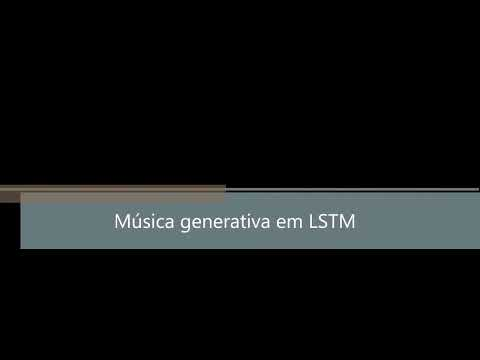

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('RJgJj5PE5P0') # https://youtu.be/RJgJj5PE5P0

---

In [ ]:
#@title **Avaliação**
Referencial_Teorico = 0 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 0 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 0 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 0 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 0 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 0.0



,tia,nome,nota
0,10390339,LEONARDO BIAGIOTTI BELOTI,0.0
1,10389222,LUCAS DAMASCENO DA CUNHA LIMA,0.0
2,10389472,LUCAS IUDI CORREGLIANO GALLINARI,0.0
3,10389723,THIAGO AIDAR FIGUEIREDO,0.0
4,10388769,YIOU WU,0.0
